# <p style="text-align: center;">Multi-Layer Perceptron (MLP) example in Keras <br> for house sales price prediction<br>using ONLY categorial features
</p>

<p style="text-align: center;">
 by Prof. Dr.-Ing. Jürgen Brauer, http://www.juergenbrauer.org
</p>

## Table of Contents

1. Retrieve categorial feature columns from data
2. Show for a categorial column possible values
3. One-hot encoding for categorial columns
4. Analyse datatype of one-hot encoded columns
5. Encoding all categorial feature columns by one-hot encoding
6. Scaling the data and preparing training matrices
7. Building the MLP model and training it
8. Testing the trained MLP
9. Predicting house prices for the Kaggle competition

## 1. Retrieve categorial feature columns from data

In [1]:
import pandas as pd
train_data = pd.read_csv("kaggle_dataset_house_prices/train.csv")
test_data  = pd.read_csv("kaggle_dataset_house_prices/test.csv")

# save the house Ids, since we need them later
# for our Kaggle submission
test_house_ids = test_data.values[:,0] # get the IDs from the original Pandas DataFrame

train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)

gt_saleprice = train_data["SalePrice"]
train_data = train_data.select_dtypes(exclude=['number'])
test_data = test_data.select_dtypes(exclude=['number'])

print(train_data.dtypes)

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

## 2. Show for a categorial column possible values

It is interesting to see which values a categorial variable can have and how often these individual categorial values occur. Let's choose a categorial variable, e.g. `GarageQual` and get all the values that can appear and how often:

In [2]:
print( train_data['GarageQual'].value_counts() )

TA    1311
0       81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64


This corresponds to the 6 possible values of the garage quality mentioned in `data_description.txt`:

    Ex	Excellent
    Gd	Good
    TA	Typical/Average
    Fa	Fair
    Po	Poor
    NA	No Garage (which we mapped using fillna() to 0)

In [3]:
labels = train_data['GarageQual'].astype('category').cat.categories.tolist()
print(labels)
print("labels has type",type(labels))

[0, 'Ex', 'Fa', 'Gd', 'Po', 'TA']
labels has type <class 'list'>


This allows us to plot a nice pie chart for showing visually how often a certain value of category appears in the dataset:

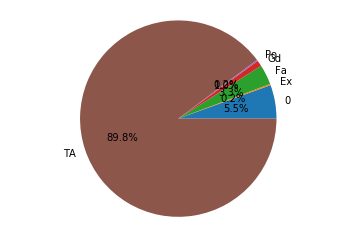

In [4]:
import matplotlib.pyplot as plt

labels = train_data['GarageQual'].astype('category').cat.categories.tolist()
counts = train_data['GarageQual'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]

plt.figure()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

## 3. One-hot encoding for categorial columns

A simple approach is to use a one-hot encoding to encode categorial features:

In [5]:
garagequal_only = train_data["GarageQual"]
print(garagequal_only)
garagequal_only_hot = pd.get_dummies(garagequal_only,
                                     columns=['GarageQual'],
                                     prefix = 'GarageQuality')
print(garagequal_only_hot)

0       TA
1       TA
2       TA
3       TA
4       TA
5       TA
6       TA
7       TA
8       Fa
9       Gd
10      TA
11      TA
12      TA
13      TA
14      TA
15      TA
16      TA
17      TA
18      TA
19      TA
20      TA
21      TA
22      TA
23      TA
24      TA
25      TA
26      TA
27      TA
28      TA
29      Fa
        ..
1430    TA
1431    TA
1432    Fa
1433    TA
1434    TA
1435    TA
1436    TA
1437    TA
1438    TA
1439    TA
1440    TA
1441    TA
1442    TA
1443    Fa
1444    TA
1445    TA
1446    TA
1447    TA
1448    Fa
1449     0
1450     0
1451    TA
1452    TA
1453     0
1454    TA
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageQual, Length: 1460, dtype: object
      GarageQuality_0  GarageQuality_Ex  GarageQuality_Fa  GarageQuality_Gd  \
0                   0                 0                 0                 0   
1                   0                 0                 0                 0   
2                   0                 0       

## 4. Analyse datatype of one-hot encoded columns

For one `GarageQual` categorial feature column which had data type "object" and where the categorial feature could have six different values [0, 'Ex', 'Fa', 'Gd', 'Po', 'TA'], we made six one-hot encoded feature columns.

In column `Gd` (Good) we will see a `1` for a house, if the garage quality is classified as "good" and otherwise we will see a `0`.

But what is the data type of this new feature columns? Let's see!

In [6]:
print("garagequal_only_hot is a ", type(garagequal_only_hot))
print(garagequal_only_hot.dtypes)

garagequal_only_hot is a  <class 'pandas.core.frame.DataFrame'>
GarageQuality_0     uint8
GarageQuality_Ex    uint8
GarageQuality_Fa    uint8
GarageQuality_Gd    uint8
GarageQuality_Po    uint8
GarageQuality_TA    uint8
dtype: object


So the data type is an unsigned integer. This makes sense!

## 5. Encoding all categorial feature columns by one-hot encoding

Now there are ...

In [7]:
print(len(train_data.dtypes))

43


... categorial feature columns in our original Pandas Dataframe `train_data`. Fortunately, we can replace all feature columns in one step:

In [8]:
train_data_hot = pd.get_dummies(train_data)
print(train_data_hot)

      MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                    0            0            0            1            0   
1                    0            0            0            1            0   
2                    0            0            0            1            0   
3                    0            0            0            1            0   
4                    0            0            0            1            0   
5                    0            0            0            1            0   
6                    0            0            0            1            0   
7                    0            0            0            1            0   
8                    0            0            0            0            1   
9                    0            0            0            1            0   
10                   0            0            0            1            0   
11                   0            0            0            1   

This shows how powerful Pandas is! One command does all the work for us. However, we can see that e.g. for the feature `MSZoning` which can have the values

    A   Agriculture
    C   Commercial
    FV  Floating Village Residential
    I   Industrial
    RH  Residential High Density
    RL  Residential Low Density
    RP  Residential Low Density Park 
    RM  Residential Medium Density

according to `data_description.txt` only 5 columns were generated, although there are in principal 8 possible values `(A,C,FV,I,RH,RL,RP,RM)` for this categorial feature:

    MSZoning_C (all) 	MSZoning_FV 	MSZoning_RH 	MSZoning_RL 	MSZoning_RM
   
What's the reason? Well, Pandas can only see the values that are really there in the table! Not more! It does not know, that these feature can in principle also have the value "A", if there is not a single row in the data frame where this value appears.

In [9]:
labels_mszoning = train_data['MSZoning'].astype('category').cat.categories.tolist()
print(labels_mszoning)

['C (all)', 'FV', 'RH', 'RL', 'RM']


For this we have to make sure, that the training data columns and the test data columns are encoded in the same way! Let's check this!

In [10]:
train_data_hot = pd.get_dummies(train_data)
test_data_hot = pd.get_dummies(test_data)
print("Shape of train_data_hot is", train_data_hot.shape)
print("Shape of test_data_hot is", test_data_hot.shape)

Shape of train_data_hot is (1460, 268)
Shape of test_data_hot is (1459, 256)


Ups! We can see that there are in the test table only 256 compared to 268 columns, i.e., there are fewer values of some categorial features and for this, Pandas uses another one-hot encoding for the test data features as for the training data features! This is bad! :( 

Why is this a problem? We cannot use training vectors of size 268 and later give the network 256 dimensional input vectors for inference, where the individual entries of this 256D input vectors also have other meanings compared to the individual entries of the 268D vectors used during training!

What can we do to solve this problem? ... I personally just went to get a coffee ... Then I had the idea! We want `get_dummies` to see ALL possible values that appear in my training and in my test data. So let's build a new dataset, where we stack...

    train.csv (1460 rows)
    test.csv (1459 rows)
    
... both data sets, then call `get_dummies` to do the 1-hot encoding on the fused data frame and then split the 1-hot encoded data frame again into two parts (training and testing). Coffee is the driving force behind innovation! ;-)

In [11]:
print("Shape of train_data is ", train_data.shape)
print("Shape of test_data is ", test_data.shape)
print("Column names of train_data are:\n", train_data.columns.values)
print("Column names of test_data are:\n", test_data.columns.values)
frames = [train_data, test_data]
fused_df = pd.concat(frames)
#print(fused_df)
print("Shape of fused_df is", fused_df.shape)

# now do the one-hot encoding
fused_df_hot_encoded = pd.get_dummies(fused_df)
print("Shape of fused_df_hot_encoded is", fused_df_hot_encoded.shape)

# now split the data frame into two data frames again
# with 1460 and 1459 rows
train_data_hot_encoded = fused_df_hot_encoded[0:1460]
test_data_hot_encoded  = fused_df_hot_encoded[1460:]
print("Shape of train_data_hot_encoded is ", train_data_hot_encoded.shape)
print("Shape of test_data_hot_encoded is ", test_data_hot_encoded.shape)


Shape of train_data is  (1460, 43)
Shape of test_data is  (1459, 43)
Column names of train_data are:
 ['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']
Column names of test_data are:
 ['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFin

Problem solved!

Our categorial training data is now one-hot encoded in `train_data_hot_encoded`<br>
Our categorial test data is now one-hot encoded in `test_data_hot_encoded`

Both one-hot encoded data matrices have 275 feature columns.

## 6. Scaling the data and preparing training matrices

When we just used numerical features for predicting house sale prices, we rescaled all the numerical features to range [0,1] in order to make it easier for the MLP to learn appropriate weights.

Here - where we use just categorial one-hot encoded features - a scaling of the input data is not needed! All values are 0 or 1. However, we need to prepare NumPy matrices and scale the output (sale price).

In [12]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1. define how NumPy shall print matrices
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True) # do not use scientific "e"-notation

# 2. convert Pandas DataFrame to NumPy matrices
#    since Keras will expect NumPy matrices
cat_train_input_matrix = train_data_hot_encoded.values
train_output_matrix    = gt_saleprice.values
train_output_matrix    = train_output_matrix.reshape(-1,1)
cat_test_input_matrix  = test_data_hot_encoded.values
print("Type of cat_train_input_matrix is", type(cat_train_input_matrix))
print("Shape of cat_train_input_matrix is", cat_train_input_matrix.shape)
print("Shape of train_output_matrix is", train_output_matrix.shape)
print("Shape of cat_test_input_matrix is", cat_test_input_matrix.shape)
print("train_data_hot_encoded:\n", train_data_hot_encoded)
print("cat_train_input_matrix:\n", cat_train_input_matrix)

# 3. create a MinMaxScaler for the train_output_matrix,
#    which is essentially a column with the final SalePrice
scaler_saleprice = MinMaxScaler(feature_range=(0, 1))
normalized_train_output_matrix = scaler_saleprice.fit_transform(train_output_matrix)
print("\ntrain_output_matrix:\n", train_output_matrix)
print("\nnormalized_train_output_matrix:\n", normalized_train_output_matrix)

Type of cat_train_input_matrix is <class 'numpy.ndarray'>
Shape of cat_train_input_matrix is (1460, 275)
Shape of train_output_matrix is (1460, 1)
Shape of cat_test_input_matrix is (1459, 275)
train_data_hot_encoded:
       MSZoning_0  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0              0                 0            0            0            1   
1              0                 0            0            0            1   
2              0                 0            0            0            1   
3              0                 0            0            0            1   
4              0                 0            0            0            1   
5              0                 0            0            0            1   
6              0                 0            0            0            1   
7              0                 0            0            0            1   
8              0                 0            0            0            0   
9           

C:\Users\Juergen Brauer\AppData\Local\conda\conda\envs\env_mss\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


## 7. Building the MLP model and training it

Now we can use the training data to train a MLP.

In [13]:
from keras.models import Sequential
from keras import layers
from keras.layers.core import Dense, Dropout
import pandas as pd
import numpy as np

model = Sequential()
model.add(Dense(160, activation="linear"))
model.add(Dense(80, activation="linear"))
model.add(Dense(1, activation="linear"))

model.compile(loss='mean_squared_error', optimizer='adam')

X = cat_train_input_matrix
Y = normalized_train_output_matrix
print("Input X has shape", X.shape)
print("Desired output Y has shape", Y.shape)
print("Y:\n", Y)
model.fit(X,Y, validation_split=0.10, epochs=100)

Using TensorFlow backend.


Input X has shape (1460, 275)
Desired output Y has shape (1460, 1)
Y:
 [[0.2411]
 [0.2036]
 [0.2619]
 ...
 [0.3216]
 [0.1489]
 [0.1564]]
Train on 1314 samples, validate on 146 samples
Epoch 1/100
1314/1314 [==============================] - 0s 234us/step - loss: 0.1379 - val_loss: 0.0195
Epoch 2/100
1314/1314 [==============================] - 0s 51us/step - loss: 0.0097 - val_loss: 0.0065
Epoch 3/100
1314/1314 [==============================] - 0s 49us/step - loss: 0.0052 - val_loss: 0.0049
Epoch 4/100
1314/1314 [==============================] - 0s 49us/step - loss: 0.0036 - val_loss: 0.0036
Epoch 5/100
1314/1314 [==============================] - 0s 56us/step - loss: 0.0037 - val_loss: 0.0100
Epoch 6/100
1314/1314 [==============================] - 0s 45us/step - loss: 0.0052 - val_loss: 0.0055
Epoch 7/100
1314/1314 [==============================] - 0s 47us/step - loss: 0.0034 - val_loss: 0.0059
Epoch 8/100
1314/1314 [==============================] - 0s 45us/step - loss: 0.0037 - 

1314/1314 [==============================] - 0s 46us/step - loss: 0.0032 - val_loss: 0.0035
Epoch 78/100
1314/1314 [==============================] - 0s 44us/step - loss: 0.0033 - val_loss: 0.0030
Epoch 79/100
1314/1314 [==============================] - 0s 44us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 80/100
1314/1314 [==============================] - 0s 46us/step - loss: 0.0026 - val_loss: 0.0029
Epoch 81/100
1314/1314 [==============================] - 0s 49us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 82/100
1314/1314 [==============================] - 0s 48us/step - loss: 0.0024 - val_loss: 0.0025
Epoch 83/100
1314/1314 [==============================] - 0s 48us/step - loss: 0.0025 - val_loss: 0.0029
Epoch 84/100
1314/1314 [==============================] - 0s 47us/step - loss: 0.0029 - val_loss: 0.0037
Epoch 85/100
1314/1314 [==============================] - 0s 52us/step - loss: 0.0031 - val_loss: 0.0033
Epoch 86/100
1314/1314 [==============================] - 0s 52us/st

## 8. Testing the trained MLP

Normally we test a model on a separate test data set. However, in this case, there is no test dataset, since the test data only contains the input features, but not the final sale prices of the houses.

For this, let us see how good the trained model can predict the sale prices of the houses from the training dataset ONLY using the categorial features.

preds_train_houses:
 [[0.2069]
 [0.2392]
 [0.2636]
 ...
 [0.336 ]
 [0.1543]
 [0.125 ]]
preds_train_houses_dollar:
 [[183891.94]
 [207145.28]
 [224691.27]
 ...
 [276838.22]
 [145989.28]
 [124910.88]]
Shape of preds_train_houses is (1460, 1)
Shape of preds_train_houses_dollar is (1460, 1)


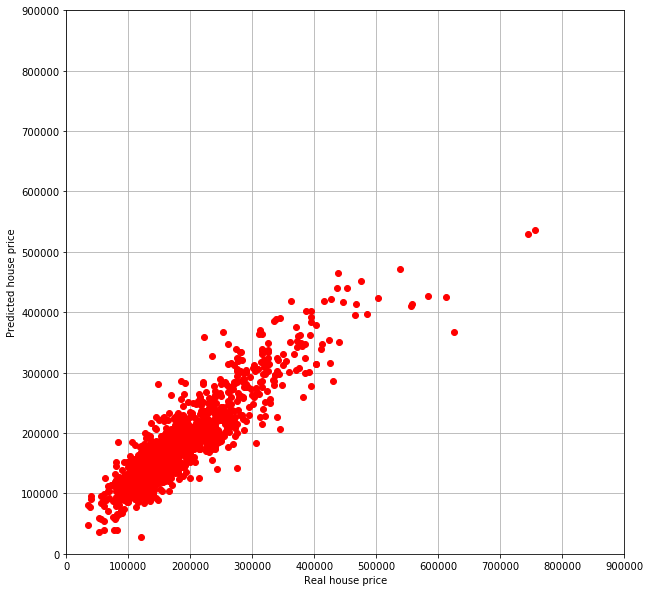

In [14]:
preds_train_houses = model.predict(cat_train_input_matrix)
print("preds_train_houses:\n", preds_train_houses)
preds_train_houses_dollar = scaler_saleprice.inverse_transform(preds_train_houses)
print("preds_train_houses_dollar:\n", preds_train_houses_dollar)
print("Shape of preds_train_houses is", preds_train_houses.shape)
print("Shape of preds_train_houses_dollar is", preds_train_houses_dollar.shape)
plt.figure( figsize=(10,10) )
plt.plot(train_output_matrix, preds_train_houses_dollar, 'ro')
plt.xlabel('Real house price', fontsize = 10)
plt.ylabel('Predicted house price', fontsize = 10)
plt.grid(True)
plt.xlim(0,900000)
plt.ylim(0,900000)
plt.show()

Let us now compute the average prediction error made in Dollars:

In [15]:
print("preds_train_houses_dollar:\n", preds_train_houses_dollar)
print("train_output_matrix:\n", train_output_matrix)
absdiff = np.abs(preds_train_houses_dollar - train_output_matrix)
print(absdiff)
average_error_in_dollar = np.mean(absdiff)
print("The final trained model made an average error of $%.2f" % average_error_in_dollar,
      "when predicting the house prices on the training data when ONLY using"
      "categorial features.")

preds_train_houses_dollar:
 [[183891.94]
 [207145.28]
 [224691.27]
 ...
 [276838.22]
 [145989.28]
 [124910.88]]
train_output_matrix:
 [[208500]
 [181500]
 [223500]
 ...
 [266500]
 [142125]
 [147500]]
[[24608.0625]
 [25645.2812]
 [ 1191.2656]
 ...
 [10338.2188]
 [ 3864.2812]
 [22589.1172]]
The final trained model made an average error of $24584.16 when predicting the house prices on the training data when ONLY usingcategorial features.


## 9. Predicting house prices for the Kaggle competition

Now we will use the trained MLP to predict the prices of the houses for which only the features are given, but not the sale price!

This file can be uploaded at Kaggle to take part at the Kaggle competition!

In [16]:
# PREDICT house prices for all the test houses!
preds_test_houses = model.predict(cat_test_input_matrix)
preds_test_houses_dollar = scaler_saleprice.inverse_transform(preds_test_houses)


# generate a Pandas dataframe
# from the NumPy prediction_matrix
preds_test_houses_dollar = preds_test_houses_dollar.reshape(-1)
print("test_house_ids has shape", test_house_ids.shape)
print("preds_test_houses_dollar has shape", preds_test_houses_dollar.shape)
predition_dataframe = pd.DataFrame({'Id'       :test_house_ids,
                                    'SalePrice':preds_test_houses_dollar}
                                  )

# convert column "Id" to int64 dtype
predition_dataframe = predition_dataframe.astype({"Id": int})
print(predition_dataframe)

# now save the Pandas dataframe to a .csv file
PREDICTION_FILENAME = "my_predicted_house_prices.csv"
predition_dataframe.to_csv(PREDICTION_FILENAME, sep=',', index=False)

test_house_ids has shape (1459,)
preds_test_houses_dollar has shape (1459,)
        Id      SalePrice
0     1461  142036.000000
1     1462  151122.156250
2     1463  191987.656250
3     1464  198912.578125
4     1465  182282.250000
5     1466  176051.125000
6     1467  155181.125000
7     1468  187433.812500
8     1469  181160.656250
9     1470  149281.578125
10    1471  131848.031250
11    1472  124078.273438
12    1473  109945.507812
13    1474  161304.609375
14    1475  123066.859375
15    1476  389858.687500
16    1477  242286.359375
17    1478  318202.625000
18    1479  321829.281250
19    1480  411836.093750
20    1481  306006.875000
21    1482  210828.312500
22    1483  153032.562500
23    1484  141716.937500
24    1485  169353.093750
25    1486  195709.062500
26    1487  348556.375000
27    1488  203381.140625
28    1489  202905.203125
29    1490  247776.468750
...    ...            ...
1429  2890   98602.929688
1430  2891  136957.250000
1431  2892   53871.351562
1432  2893   5